In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Read two csv from john hopkin's and merge into df

In [2]:
usa = pd.read_csv("data/US_2020-05-06.csv") 
display(usa.info())
usa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
country          72 non-null object
date             72 non-null object
confirmed        72 non-null int64
deaths           72 non-null int64
new_confirmed    72 non-null int64
new_deaths       72 non-null int64
tagged_day       72 non-null int64
dtypes: int64(5), object(2)
memory usage: 4.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5


In [3]:
kor = pd.read_csv("data/SouthKorea_2020-05-06.csv") 
display(kor.info())
kor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
country          90 non-null object
date             90 non-null object
confirmed        90 non-null int64
deaths           90 non-null int64
new_confirmed    90 non-null int64
new_deaths       90 non-null int64
tagged_day       90 non-null int64
dtypes: int64(5), object(2)
memory usage: 5.0+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,"Korea, South",2/6/20,23,0,4,0,1
1,"Korea, South",2/7/20,24,0,1,0,2
2,"Korea, South",2/8/20,24,0,0,0,3
3,"Korea, South",2/9/20,25,0,1,0,4
4,"Korea, South",2/10/20,27,0,2,0,5


In [4]:
# joining on vertical stacks (axi s0 for addition to rows) for df's of kor & usa
df = pd.concat([usa, kor], axis=0)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
country          162 non-null object
date             162 non-null object
confirmed        162 non-null int64
deaths           162 non-null int64
new_confirmed    162 non-null int64
new_deaths       162 non-null int64
tagged_day       162 non-null int64
dtypes: int64(5), object(2)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",5/1/20,10780,250,6,2,86
86,"Korea, South",5/2/20,10793,250,13,0,87
87,"Korea, South",5/3/20,10801,252,8,2,88
88,"Korea, South",5/4/20,10804,254,3,2,89


In [5]:
# change date to type datetime
df['date'] = pd.to_datetime(df.date)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
country          162 non-null object
date             162 non-null datetime64[ns]
confirmed        162 non-null int64
deaths           162 non-null int64
new_confirmed    162 non-null int64
new_deaths       162 non-null int64
tagged_day       162 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2020-02-24,51,0,36,0,1
1,US,2020-02-25,51,0,0,0,2
2,US,2020-02-26,57,0,6,0,3
3,US,2020-02-27,58,0,1,0,4
4,US,2020-02-28,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",2020-05-01,10780,250,6,2,86
86,"Korea, South",2020-05-02,10793,250,13,0,87
87,"Korea, South",2020-05-03,10801,252,8,2,88
88,"Korea, South",2020-05-04,10804,254,3,2,89


#### add country code column to df

In [6]:
def country_code(row):
    if row['country'] == 'US':
        return 'USA'
    if row['country'] == 'Korea, South':
        return 'KOR'

In [7]:
df.apply(lambda row: country_code(row), axis=1)

0     USA
1     USA
2     USA
3     USA
4     USA
     ... 
85    KOR
86    KOR
87    KOR
88    KOR
89    KOR
Length: 162, dtype: object

In [8]:
df['country code'] = df.apply(lambda row: country_code(row), axis=1)
df

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code
0,US,2020-02-24,51,0,36,0,1,USA
1,US,2020-02-25,51,0,0,0,2,USA
2,US,2020-02-26,57,0,6,0,3,USA
3,US,2020-02-27,58,0,1,0,4,USA
4,US,2020-02-28,60,0,2,0,5,USA
...,...,...,...,...,...,...,...,...
85,"Korea, South",2020-05-01,10780,250,6,2,86,KOR
86,"Korea, South",2020-05-02,10793,250,13,0,87,KOR
87,"Korea, South",2020-05-03,10801,252,8,2,88,KOR
88,"Korea, South",2020-05-04,10804,254,3,2,89,KOR


## Read owa testing df

In [9]:
testing = pd.read_csv("data/covid-19-tests-deaths-scatter-with-comparisons_2020May07.csv")
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
Entity                                                                            9437 non-null object
Code                                                                              8737 non-null object
Date                                                                              9437 non-null object
Total tests per million people                                                    4216 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per million)    8223 non-null float64
dtypes: float64(2), object(3)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,24-Mar-20,NaN,0.026
1,Afghanistan,AFG,25-Mar-20,NaN,0.026
2,Afghanistan,AFG,26-Mar-20,NaN,0.026
3,Afghanistan,AFG,27-Mar-20,NaN,0.026
4,Afghanistan,AFG,28-Mar-20,NaN,0.051


In [10]:
# change date to type datetime
testing['Date'] = pd.to_datetime(testing.Date)
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
Entity                                                                            9437 non-null object
Code                                                                              8737 non-null object
Date                                                                              9437 non-null datetime64[ns]
Total tests per million people                                                    4216 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per million)    8223 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,2020-03-24,NaN,0.026
1,Afghanistan,AFG,2020-03-25,NaN,0.026
2,Afghanistan,AFG,2020-03-26,NaN,0.026
3,Afghanistan,AFG,2020-03-27,NaN,0.026
4,Afghanistan,AFG,2020-03-28,NaN,0.051


## Joining 3 df's into one

In [11]:
# left_on = df['']

In [12]:
df2 = pd.merge(left=df, right=testing, how='left', left_on=['date','country code'], right_on=['Date', 'Code'])
display(df2.info())
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 13 columns):
country                                                                           162 non-null object
date                                                                              162 non-null datetime64[ns]
confirmed                                                                         162 non-null int64
deaths                                                                            162 non-null int64
new_confirmed                                                                     162 non-null int64
new_deaths                                                                        162 non-null int64
tagged_day                                                                        162 non-null int64
country code                                                                      162 non-null object
Entity                                                                      

None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,US,2020-02-24,51,0,36,0,1,USA,NaN,NaN,NaT,NaN,NaN
1,US,2020-02-25,51,0,0,0,2,USA,NaN,NaN,NaT,NaN,NaN
2,US,2020-02-26,57,0,6,0,3,USA,NaN,NaN,NaT,NaN,NaN
3,US,2020-02-27,58,0,1,0,4,USA,NaN,NaN,NaT,NaN,NaN
4,US,2020-02-28,60,0,2,0,5,USA,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,"Korea, South",2020-05-01,10780,250,6,2,86,KOR,South Korea,KOR,2020-05-01,12153.0,4.837
158,"Korea, South",2020-05-02,10793,250,13,0,87,KOR,South Korea,KOR,2020-05-02,12241.0,4.876
159,"Korea, South",2020-05-03,10801,252,8,2,88,KOR,South Korea,KOR,2020-05-03,12307.0,4.876
160,"Korea, South",2020-05-04,10804,254,3,2,89,KOR,South Korea,KOR,2020-05-04,12365.0,4.915


In [13]:
df3 = df2.copy(deep=True)

# needed cols: 'country code','date','tagged_day','Total tests per million people','confirmed','deaths','new_confirmed','new_deaths', 
#                    'Total confirmed deaths due to COVID-19 per million people (deaths per million)'

df3_dropped_cols = ['country', 'Entity', 'Code', 'Date']
df3 = df3.drop(labels=df3_dropped_cols, axis=1)
df3

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,2020-02-24,51,0,36,0,1,USA,NaN,NaN
1,2020-02-25,51,0,0,0,2,USA,NaN,NaN
2,2020-02-26,57,0,6,0,3,USA,NaN,NaN
3,2020-02-27,58,0,1,0,4,USA,NaN,NaN
4,2020-02-28,60,0,2,0,5,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...
157,2020-05-01,10780,250,6,2,86,KOR,12153.0,4.837
158,2020-05-02,10793,250,13,0,87,KOR,12241.0,4.876
159,2020-05-03,10801,252,8,2,88,KOR,12307.0,4.876
160,2020-05-04,10804,254,3,2,89,KOR,12365.0,4.915


In [14]:
df3.to_csv("df3.out.csv", index= False)

In [18]:
df4 = df3.copy(deep=True)
display(df4.shape)
display(df4.info())

(162, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 9 columns):
date                                                                              162 non-null datetime64[ns]
confirmed                                                                         162 non-null int64
deaths                                                                            162 non-null int64
new_confirmed                                                                     162 non-null int64
new_deaths                                                                        162 non-null int64
tagged_day                                                                        162 non-null int64
country code                                                                      162 non-null object
Total tests per million people                                                    150 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per millio

None

In [22]:
df4.dropna(axis=0, inplace=True)
display(df4.shape)
display(df4.info())
df4.head()

(135, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 12 to 161
Data columns (total 9 columns):
date                                                                              135 non-null datetime64[ns]
confirmed                                                                         135 non-null int64
deaths                                                                            135 non-null int64
new_confirmed                                                                     135 non-null int64
new_deaths                                                                        135 non-null int64
tagged_day                                                                        135 non-null int64
country code                                                                      135 non-null object
Total tests per million people                                                    135 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per milli

None

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
12,2020-03-07,402,17,140,3,13,USA,11.0,0.042
13,2020-03-08,518,21,116,4,14,USA,14.0,0.051
14,2020-03-09,583,22,65,1,15,USA,19.0,0.063
15,2020-03-10,959,28,376,6,16,USA,27.0,0.079
16,2020-03-11,1281,36,322,8,17,USA,38.0,0.085


In [29]:
dfkor = df4.loc[df4['country code'] == 'USA']
dfkor

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
12,2020-03-07,402,17,140,3,13,USA,11.0,0.042
13,2020-03-08,518,21,116,4,14,USA,14.0,0.051
14,2020-03-09,583,22,65,1,15,USA,19.0,0.063
15,2020-03-10,959,28,376,6,16,USA,27.0,0.079
16,2020-03-11,1281,36,322,8,17,USA,38.0,0.085
17,2020-03-12,1663,41,382,5,18,USA,54.0,0.091
18,2020-03-13,2179,49,516,8,19,USA,81.0,0.121
19,2020-03-14,2727,58,548,9,20,USA,95.0,0.142
20,2020-03-15,3499,73,772,15,21,USA,118.0,0.172
21,2020-03-16,4632,99,1133,26,22,USA,171.0,0.208


In [30]:
dfusa = df4.loc[df4['country code'] == 'KOR']
dfusa

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
87,2020-02-21,204,2,100,1,16,KOR,289.0,0.020
88,2020-02-22,433,2,229,0,17,KOR,383.0,0.039
89,2020-02-23,602,6,169,4,18,KOR,441.0,0.098
90,2020-02-24,833,8,231,2,19,KOR,558.0,0.137
91,2020-02-25,977,10,144,2,20,KOR,716.0,0.156
...,...,...,...,...,...,...,...,...,...
157,2020-05-01,10780,250,6,2,86,KOR,12153.0,4.837
158,2020-05-02,10793,250,13,0,87,KOR,12241.0,4.876
159,2020-05-03,10801,252,8,2,88,KOR,12307.0,4.876
160,2020-05-04,10804,254,3,2,89,KOR,12365.0,4.915


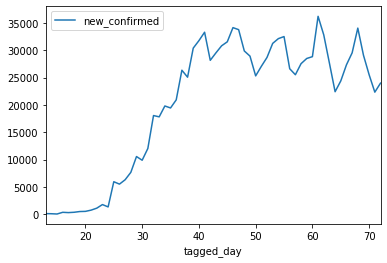

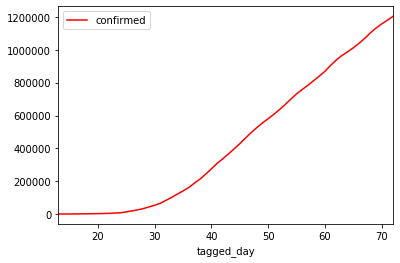

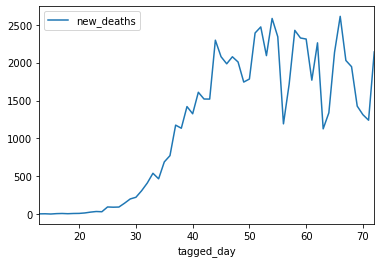

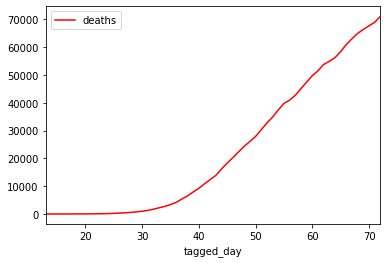

In [46]:
dfkor.plot(x='tagged_day', y='new_confirmed')
dfkor.plot(x='tagged_day', y='confirmed', color = 'red')
dfkor.plot(x='tagged_day', y='new_deaths')
dfkor.plot(x='tagged_day', y='deaths', color = 'red')

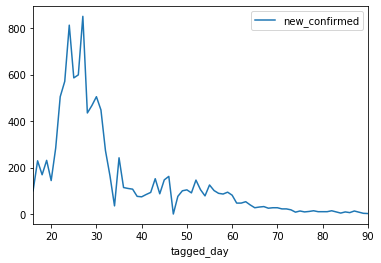

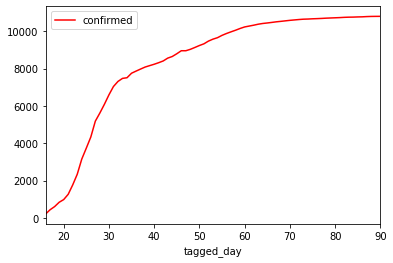

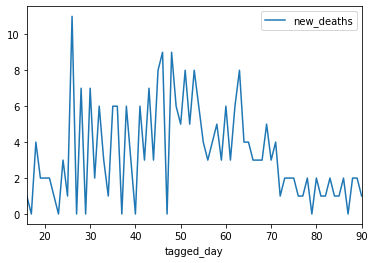

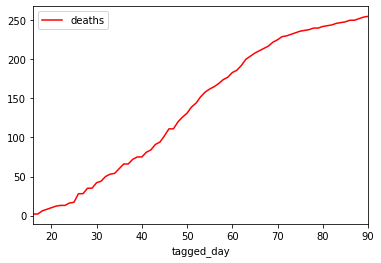

In [47]:
dfusa.plot(x='tagged_day', y='new_confirmed')
dfusa.plot(x='tagged_day', y='confirmed', color = 'red')
dfusa.plot(x='tagged_day', y='new_deaths')
dfusa.plot(x='tagged_day', y='deaths', color = 'red')

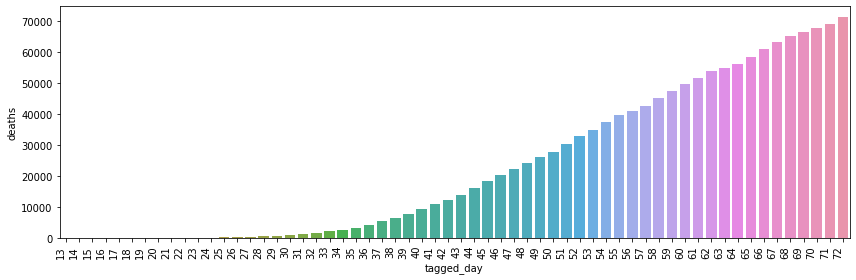

In [68]:
plt.figure(figsize=(12,4))
ax1 = sns.barplot(x="tagged_day", y="deaths", data=dfkor)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

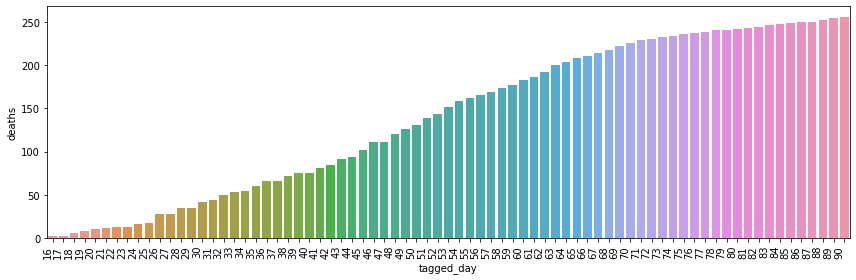

In [69]:
plt.figure(figsize=(12,4))
ax2 = sns.barplot(x="tagged_day", y="deaths", data=dfusa)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

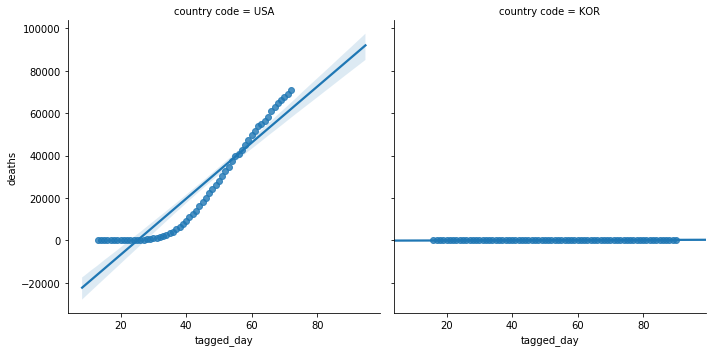

In [60]:
sns.lmplot(x="tagged_day", y="deaths", data = df4, col="country code")

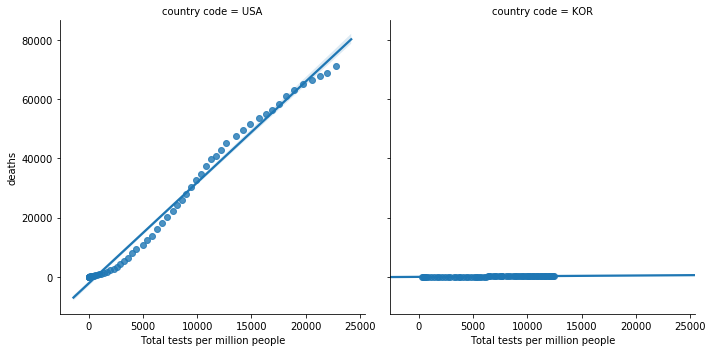

In [61]:
sns.lmplot(x="Total tests per million people", y="deaths", data = df4, col="country code")